<a href="https://colab.research.google.com/github/pavi-ninjaac/SARS_CoV_2_DNA_Analysis/blob/main/Creat_dataset/Creat_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating the dataset

In [ ]:
!pip install Bio

In [ ]:
from Bio import SeqIO
from collections import defaultdict
import math

import numpy as np
import pandas as pd
import seaborn as sns
#vsualization
from matplotlib import pyplot as plt
from matplotlib import cm
import pylab

# Generate the pandas dataframe

In [142]:
def generate_data(file_list):
  X = []
  y = []
  label = 0 # for hiv
  for i in file_list:
    filepath = '/content/drive/MyDrive/Colab Notebooks/dataFiles/DNA_Genome_Analysis_covid19/'+i+'.fasta'
    records = list(SeqIO.parse(filepath , 'fasta'))

    for index in range(len(records)):
      X.append(str(records[index].seq))
      y.append(label)
    label = 1 #for covid19
  
  data = pd.DataFrame({'DNASequence' : X , 'label' : y})

  return data

In [143]:
file_list = ['Negative' , 'Covid19']
data = generate_data(file_list)
data.head(5)

,DNASequence,label
0,CCTCAAATCACTCTTTGGCAGCGACCCCTTGTCTCAATAAAAATAG...,0
1,CCTCAAATCACTCTTTGGCAACGACCCCTGGTCCCAATAAAAATAG...,0
2,CCTCAGATCACTCTTTGGCAGCGACCCCTTGTCTCAATAAAAATAG...,0
3,CCTCAGATCACTCTTTGGCAGCGACCCCTTGTCCCAATAAAAGTAG...,0
4,CCTCAAATCACTCTTTGGCAGCGACCCCTTGTCCCAATAAAAGTAG...,0


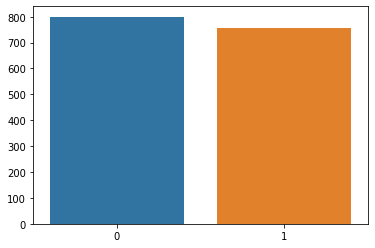

In [ ]:
category = data['label'].value_counts()
sns.barplot(x=category.index,y=category.values)

In [ ]:
#healping functions
#count the occurance of the kmers
def kmer_count(data , k ):
  d = defaultdict(int)

  for i in range(len(data) - (k-1)):
    d[data[i : i+k ]] += 1
  for key in list(d):
    if 'N' in key:
      del d[key]
  return d

# find the each kmer propability
def propability_kmer(kmer_count_dict , k , len_data):
  N = len_data
  total_len_kemrs = N-k+1
  prop = defaultdict(float)
  for key,value in kmer_count_dict.items():
    prop[key] = float(value) / total_len_kemrs #n(A)/P(s)
  return prop

def Choas_Game_Representation(propability_kmer_dict , k):
  array_size = int(math.sqrt(4**k))
  #print(array_size)
  choas = []
  #intializing the array
  for i in range(array_size):
    choas.append([0] * array_size)
  
  #initializing the axis
  maxX = array_size
  maxY = array_size
  posX = 1
  posY = 1

  for key,value in propability_kmer_dict.items():
    #print(key)
    for char in key:
      if char == "T":
                posX += maxX / 2
      elif char == "C":
                posY += maxY / 2
      elif char == "G":
                posX += maxX / 2
                posY += maxY / 2
      maxX /= 2
      maxY /= 2
    posX,posY = int(posX) ,int(posY)
    choas[posY-1][posX-1] = value
      #reinitializing to the starting value
    maxX = array_size
    maxY = array_size
    posX = 1
    posY = 1

  return choas

In [ ]:
def generate_image(data):
  samples = len(data)
  print('Conversion started..........')
  for i in range(samples):
    d = data.iloc[i,0]
    
    #fiind the frequency
    kmer_count_dict_7 = kmer_count(d , 7)

    #find the propability
    propability_kmer_dict_7 = propability_kmer(kmer_count_dict_7 , 7 , samples)

    choas_rep_matrix_7 = Choas_Game_Representation(propability_kmer_dict_7 , 7)

    plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False)
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
    #print(choas_rep_matrix_7)
    plt.imshow(choas_rep_matrix_7 , interpolation='nearest' , cmap=cm.gray_r)
    #pylab.imshow(choas_rep_matrix_7, interpolation='nearest', cmap=cm.gray_r)
    d_class = int(data.iloc[i,1])
    

    if d_class == 1:
      # save the image in negative tab
      plt.savefig('/content/drive/MyDrive/Colab Notebooks/dataFiles/DNA_Genome_Analysis_covid19/generated_FCGR_Images/Covid19/sample'+str(i)+'.png' , bbox_inches = 'tight')
    else:
      plt.savefig('/content/drive/MyDrive/Colab Notebooks/dataFiles/DNA_Genome_Analysis_covid19/generated_FCGR_Images/Negative/sample'+str(i)+'.png' , bbox_inches = 'tight')
    if i%100 == 0 :
      print('complted',i ,'samples..........')
  print('Converting Done!!!!!!!!!!!!!!!')

Conversion started..........
complted 0 samples..........
complted 100 samples..........
complted 200 samples..........
complted 300 samples..........
complted 400 samples..........
complted 500 samples..........
complted 600 samples..........
complted 700 samples..........
complted 800 samples..........
complted 900 samples..........
complted 1000 samples..........
complted 1100 samples..........
complted 1200 samples..........
complted 1300 samples..........
complted 1400 samples..........
complted 1500 samples..........
Converting Done!!!!!!!!!!!!!!!


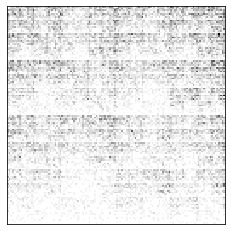

In [ ]:
generate_image(data)

# Generate the dataframe , contaning the image array

In [152]:
def generate_dataframe(data):
  samples = len(data)
  FCGR = []
  l = []
  print('Conversion started..........')
  for i in range(samples):
    
    d = data.iloc[i,0]
    label = data.iloc[i,1]    
    #fiind the frequency
    kmer_count_dict_7 = kmer_count(d , 7)

    #find the propability
    propability_kmer_dict_7 = propability_kmer(kmer_count_dict_7 , 7 , samples)
    #generate the frequency matrix
    choas_rep_matrix_7 = Choas_Game_Representation(propability_kmer_dict_7 , 7)
    #convert the list into array
    #choas_rep_matrix_7 = np.array(choas_rep_matrix_7)
    #flatten the array to store in the dataframe
    FCGR.append(choas_rep_matrix_7)
    l.append(label)
    if i%100 == 0 :
      print('complted',i ,'samples..........')
  X = np.array(FCGR)
  y = np.array(l)
  #data = pd.DataFrame({'fcgr' : FCGR , 'label' : l}) #convert the array into dataframe
  #data = pd.DataFrame([FCGR , l] , columns = ['fcgr' , 'label'])
  print('Converting Done!!!!!!!!!!!!!!!')
  return X , y

In [153]:
X , y = generate_dataframe(data)

Conversion started..........
complted 0 samples..........
complted 100 samples..........
complted 200 samples..........
complted 300 samples..........
complted 400 samples..........
complted 500 samples..........
complted 600 samples..........
complted 700 samples..........
complted 800 samples..........
complted 900 samples..........
complted 1000 samples..........
complted 1100 samples..........
complted 1200 samples..........
complted 1300 samples..........
complted 1400 samples..........
complted 1500 samples..........
Converting Done!!!!!!!!!!!!!!!


In [154]:
#save the numpy file
np.save('/content/drive/MyDrive/Colab Notebooks/dataFiles/DNA_Genome_Analysis_covid19/generated_FCGR_Images/dna_image_pixel_x',X,allow_pickle=True)
np.save('/content/drive/MyDrive/Colab Notebooks/dataFiles/DNA_Genome_Analysis_covid19/generated_FCGR_Images/dna_image_pixcel_y',y,allow_pickle=True)

In [158]:
X = np.load('/content/drive/MyDrive/Colab Notebooks/dataFiles/DNA_Genome_Analysis_covid19/generated_FCGR_Images/dna_image_pixel_x.npy')
y = np.load('/content/drive/MyDrive/Colab Notebooks/dataFiles/DNA_Genome_Analysis_covid19/generated_FCGR_Images/dna_image_pixcel_y.npy')
X = X.reshape((X.shape[0],1,128,128))
X.shape

(1557, 1, 128, 128)

In [ ]:
#data_df.iloc[0,0].reshape((1,128,128))
data_df.head()

,fcgr,label
0,"[0.0006447453255963894, 0.0019342359767891683,...",0
1,"[0.0, 0.0006447453255963894, 0.001289490651192...",0
2,"[0.0, 0.0006447453255963894, 0.000644745325596...",0
3,"[0.0, 0.0, 0.0006447453255963894, 0.0006447453...",0
4,"[0.0006447453255963894, 0.0006447453255963894,...",0


In [ ]:
data_df.shape

(1557, 2)

# dataset description
columns - 2 ---> fcgr , label <br>
fcgr ---> containing samples fo the DNA in the 1D numpy array
          shape -- > (16384,) (should be converted into (1,128,128) shapeded array.<br>

label ---> 0 or 1 
           1 ---> Covid positive
           0 ---> covid negative 

In [ ]:
#save the dataframe
data_df.to_csv('/content/drive/MyDrive/Colab Notebooks/dataFiles/DNA_Genome_Analysis_covid19/generated_FCGR_Images/fcgr_image_128.csv')